# Exploratory Data Analysis
Takato Matsumoto  
COVID-19の分析  
## Dataset
This is a COVID-19 datset in Japan. This does not include the cases in Diamond Princess cruise ship (Yokohama city, Kanagawa prefecture) and Costa Atlantica cruise ship (Nagasaki city, Nagasaki prefecture).

Total number of cases in Japan
The number of cases at prefecture level
Metadata of each prefecture
Before analysing the data, please refere to Kaggle notebook: EDA of Japan dataset and COVID-19: Government/JHU data in Japan.
The detailed explanation of the build process is discussed in Steps to build the dataset in Japan.
If you find errors or have any questions, feel free to create a discussion topic.

In [0]:
#ライブラリの読み込み
import os.path
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

#グラフの設定
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (15,10)

In [0]:
covid_url = "https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_2/dataset/130001_tokyo_covid19_combined_telephone_advice_center.csv"
df = pd.read_csv(covid_url, low_memory=False)

covid_total_url = 'https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_2/covid19-dataset-in-japan/covid_jpn_total.csv'
df_total = pd.read_csv(covid_total_url, low_memory=False)

In [0]:
df_total = df_total[df_total['Location']=='Domestic']
df_total
df_total = df_total.rename(
    {"Positive": "confirmed", "Discharged": "recovered", "Fatal": "deaths", "Date": "date",  "Tested": "tested", "Recovered": "recoverd", "Infected": "infected"},
    axis=1
)
df_total["infected"] = df_total["confirmed"] - df_total["deaths"] - df_total["recovered"]


In [0]:
df_total = df_total.reset_index()

In [0]:
df_total = df_total.drop(['index', 'Location', 'Hosp_mild', 'Hosp_unknown'], axis=1)

In [0]:
df_total

,date,confirmed,tested,Hosp_require,Hosp_severe,recovered,deaths,infected
0,2020/02/06,16,132.0,12,0,4,0,12
1,2020/02/07,16,151.0,12,0,4,0,12
2,2020/02/10,16,174.0,7,0,9,0,7
3,2020/02/12,16,190.0,6,0,10,0,6
4,2020/02/13,17,200.0,6,0,11,0,6
...,...,...,...,...,...,...,...,...
100,2020/05/21,16251,221397.0,2761,195,12655,777,2819
101,2020/05/22,16339,224972.0,2495,176,12988,796,2555
102,2020/05/23,16362,227445.0,2293,174,13227,808,2327
103,2020/05/24,16375,229669.0,2130,168,13396,820,2159


In [0]:
for col in df_total.columns:
  if col == 'date':
    continue
  col_name = col + '_diff'
  df_total[col_name] = df_total[col].diff(1)


In [0]:
df_total

,date,confirmed,tested,Hosp_require,Hosp_severe,recovered,deaths,infected,confirmed_diff,tested_diff,Hosp_require_diff,Hosp_severe_diff,recovered_diff,deaths_diff,infected_diff
0,2020/02/06,16,132.0,12,0,4,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/02/07,16,151.0,12,0,4,0,12,0.0,19.0,0.0,0.0,0.0,0.0,0.0
2,2020/02/10,16,174.0,7,0,9,0,7,0.0,23.0,-5.0,0.0,5.0,0.0,-5.0
3,2020/02/12,16,190.0,6,0,10,0,6,0.0,16.0,-1.0,0.0,1.0,0.0,-1.0
4,2020/02/13,17,200.0,6,0,11,0,6,1.0,10.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2020/05/21,16251,221397.0,2761,195,12655,777,2819,39.0,2653.0,-248.0,-15.0,386.0,6.0,-353.0
101,2020/05/22,16339,224972.0,2495,176,12988,796,2555,88.0,3575.0,-266.0,-19.0,333.0,19.0,-264.0
102,2020/05/23,16362,227445.0,2293,174,13227,808,2327,23.0,2473.0,-202.0,-2.0,239.0,12.0,-228.0
103,2020/05/24,16375,229669.0,2130,168,13396,820,2159,13.0,2224.0,-163.0,-6.0,169.0,12.0,-168.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text major ticklabel objects>)

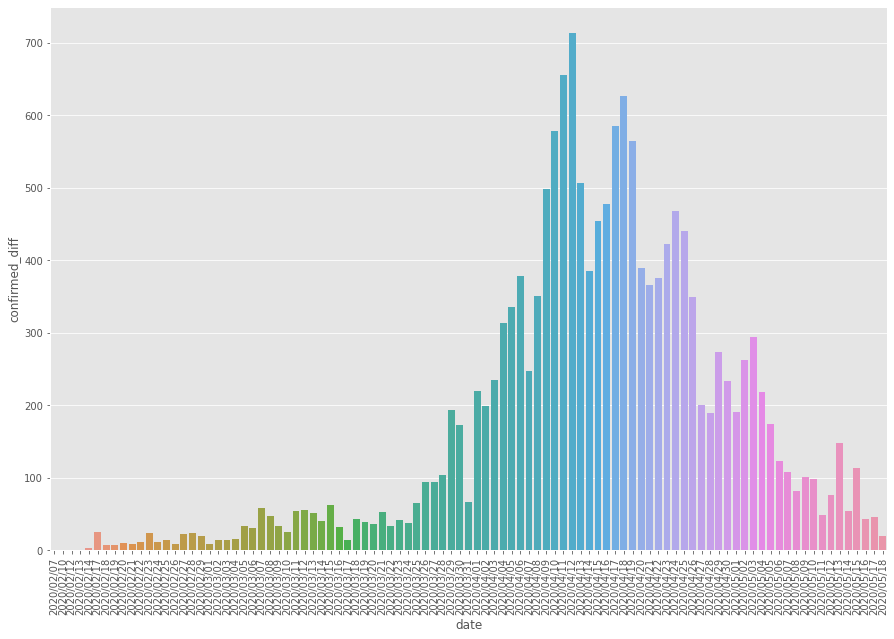

In [0]:
df_total = df_total.dropna()
df_total
sns.barplot(x='date', y='confirmed_diff', data=df_total)
plt.xticks(    rotation=90)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


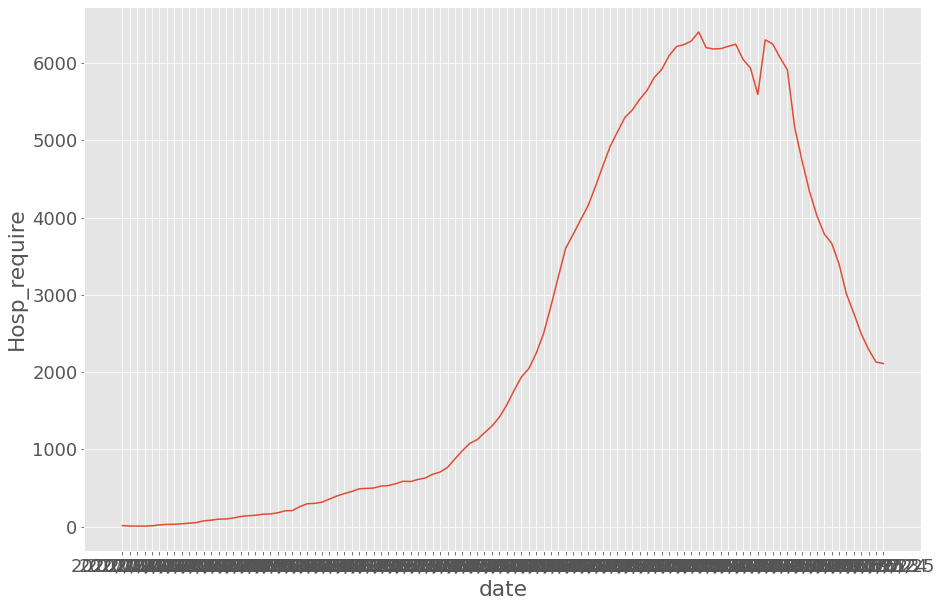

In [0]:
sns.lineplot(x='date', y='Hosp_require', data=df_total)

In [0]:
df_total.corr()

,confirmed,tested,Hosp_require,Hosp_severe,recovered,deaths,infected,confirmed_diff,tested_diff,Hosp_require_diff,Hosp_severe_diff,recovered_diff,deaths_diff,infected_diff,Hosp_require_future
confirmed,1.000000,0.980178,0.879028,0.936770,0.841933,0.939721,0.782451,0.270674,0.499390,-0.329788,-0.215672,0.570244,0.622694,-0.342130,0.786307
tested,0.980178,1.000000,0.774184,0.857145,0.927438,0.983021,0.649032,0.155988,0.469260,-0.414454,-0.307251,0.567225,0.566963,-0.400845,0.704836
Hosp_require,0.879028,0.774184,1.000000,0.976388,0.494028,0.676037,0.971754,0.538361,0.542665,-0.026508,0.037855,0.512369,0.659975,-0.148349,0.912615
Hosp_severe,0.936770,0.857145,0.976388,1.000000,0.614152,0.781686,0.933829,0.419837,0.529013,-0.164991,-0.040857,0.526218,0.659575,-0.225057,0.867955
recovered,0.841933,0.927438,0.494028,0.614152,1.000000,0.968476,0.322788,-0.132137,0.312684,-0.579608,-0.466090,0.527117,0.411993,-0.521077,0.360785
deaths,0.939721,0.983021,0.676037,0.781686,0.968476,1.000000,0.530025,-0.011641,0.387785,-0.519959,-0.408142,0.569075,0.522386,-0.493153,0.552382
infected,0.782451,0.649032,0.971754,0.933829,0.322788,0.530025,1.000000,0.630730,0.516293,0.092348,0.161961,0.391599,0.616375,0.003420,0.956052
confirmed_diff,0.270674,0.155988,0.538361,0.419837,-0.132137,-0.011641,0.630730,1.000000,0.306090,0.547877,0.504701,0.007688,0.274380,0.534980,0.799012
tested_diff,0.499390,0.469260,0.542665,0.529013,0.312684,0.387785,0.516293,0.306090,1.000000,0.034706,-0.005618,0.477404,0.429753,-0.239274,0.526542
Hosp_require_diff,-0.329788,-0.414454,-0.026508,-0.164991,-0.579608,-0.519959,0.092348,0.547877,0.034706,1.000000,0.335490,-0.122812,-0.043279,0.404553,0.258153


In [0]:
#ライブラリの読み込み
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb


In [0]:
df_total['Hosp_require_future'] = df_total.Hosp_require.shift(-7)

In [0]:
#ファイルの読み込み
num = 30
train_csv = df_total.iloc[:num]
test_csv = df_total.iloc[num:]

In [0]:
#説明変数の読み込み
X_trainvalid = df_total.drop(["Hosp_require_future"], axis=1).iloc[:num]
X_test = df_total.drop(['Hosp_require_future'], axis=1).iloc[num:]

In [0]:
#train dataとtest dataの結合（データの取り扱いを簡単にしています）
X_traintest_temp = pd.concat([X_trainvalid, X_test], axis=0)

In [0]:
df_total.columns

Index(['date', 'confirmed', 'tested', 'Hosp_require', 'Hosp_severe',
       'recovered', 'deaths', 'infected', 'confirmed_diff', 'tested_diff',
       'Hosp_require_diff', 'Hosp_severe_diff', 'recovered_diff',
       'deaths_diff', 'infected_diff', 'Hosp_require_future'],
      dtype='object')

In [0]:
#説明変数の選択
df_total.columns
#X_traintest = X_traintest_temp[['infected','Hosp_require']] 
X_traintest = X_traintest_temp.drop(['date',], axis=1)


In [0]:
#目的変数の読み込み
y_train = train_csv["Hosp_require_future"].values

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_traintest = sc_x.fit_transform(X_traintest)
y_train = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

In [0]:
#train dataとtest dataの分割
X_train = X_traintest[:train_csv.shape[0], :]
X_test = X_traintest[train_csv.shape[0]:, :]

In [0]:
#線形回帰モデルの構築とモデルによる予測
model = LinearRegression().fit(X_train, y_train)
test_pred = model.predict(X_test)

In [0]:
#提出ファイルの出力
test_pred = model.predict(X_test)
sub_df = pd.DataFrame({"date":test_csv["date"].values,"Hosp_require_future":sc_y.inverse_transform(test_pred)})
sub_df['Hosp_require_future'] = sub_df['Hosp_require_future'].shift(7)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103],
 <a list of 104 Text major ticklabel objects>)

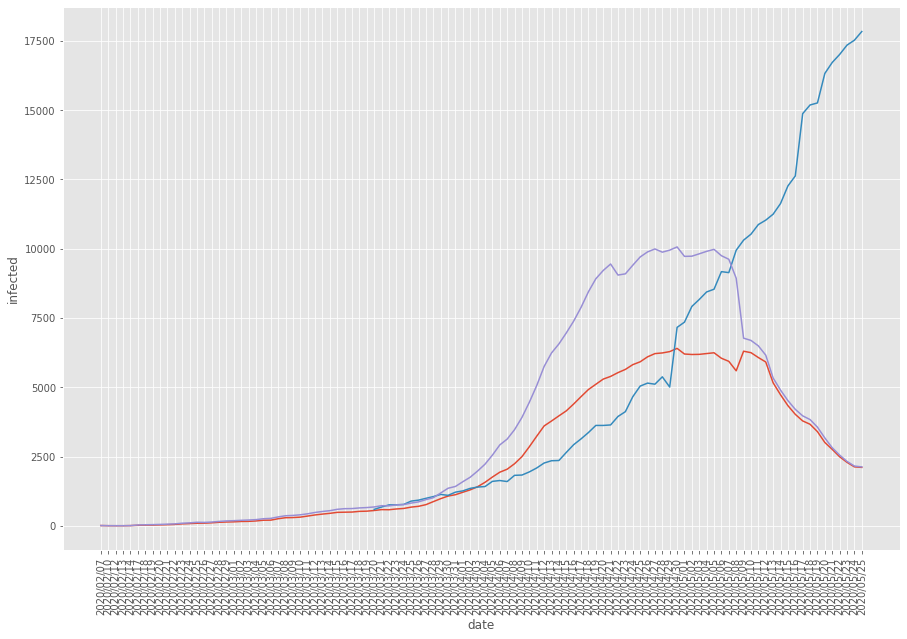

In [0]:
plt.rcParams['figure.figsize'] = (15,10)
sns.lineplot(x='date', y='Hosp_require', data=df_total)
sns.lineplot(x='date', y='Hosp_require_future', data=sub_df)

sns.lineplot(x='date', y='infected', data=df_total)
plt.xticks(    rotation=90)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


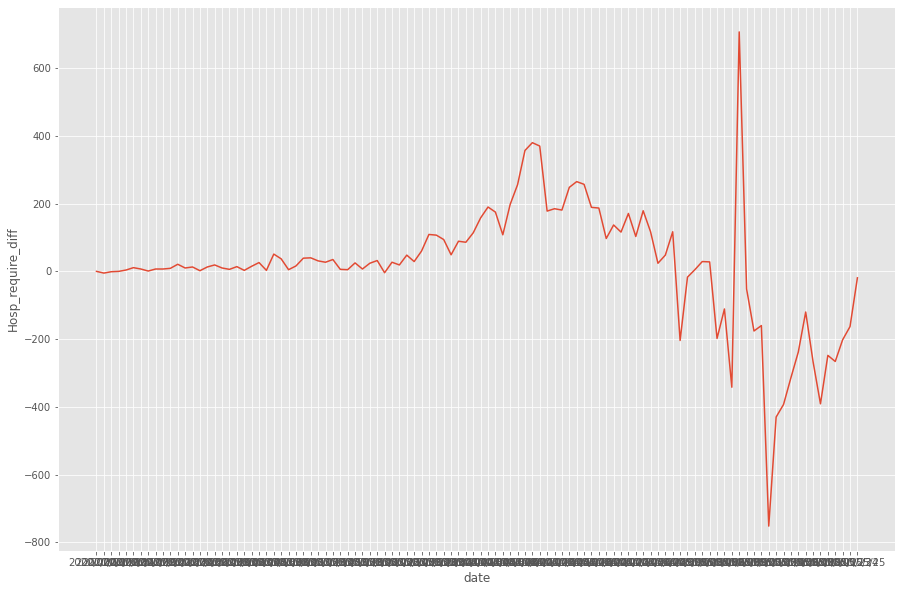

In [0]:
sns.lineplot(x='date', y='Hosp_require_diff', data=df_total)

In [0]:
covid_url = "https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_2/covid19-dataset-in-japan/covid_jpn_prefecture.csv"
df_covid = pd.read_csv(covid_url, low_memory=False)
df_covid = df_covid.rename(
    {"Positive": "confirmed", "Discharged": "recovered", "Fatal": "deaths", "Date": "date", "Prefecture": "prefecture", "Tested": "tested", "Recovered": "recoverd", "Infected": "infected"},
    axis=1
)
df_covid["infected"] = df_covid["confirmed"] - df_covid["deaths"] - df_covid["recovered"]
df_covid = df_covid.sort_values(['prefecture', 'date'])
df_covid


,date,prefecture,confirmed,tested,recovered,deaths,Hosp_require,Hosp_severe,infected
22,2020-03-18,Aichi,130,847.0,3.0,14.0,NaN,NaN,113.0
69,2020-03-19,Aichi,134,847.0,3.0,14.0,NaN,NaN,117.0
116,2020-03-20,Aichi,139,847.0,3.0,16.0,NaN,NaN,120.0
163,2020-03-21,Aichi,141,847.0,8.0,16.0,NaN,NaN,117.0
210,2020-03-22,Aichi,143,847.0,8.0,16.0,NaN,NaN,119.0
...,...,...,...,...,...,...,...,...,...
2979,2020-05-20,Yamanashi,60,3483.0,52.0,0.0,8.0,1.0,8.0
3026,2020-05-21,Yamanashi,60,3550.0,55.0,0.0,5.0,1.0,5.0
3073,2020-05-22,Yamanashi,60,3602.0,56.0,0.0,4.0,1.0,4.0
3120,2020-05-23,Yamanashi,60,3602.0,56.0,0.0,4.0,1.0,4.0


In [0]:
df_covid.corr()

,confirmed,tested,recovered,deaths,Hosp_require,Hosp_severe,infected
confirmed,1.000000,0.696997,0.746265,0.806877,0.893190,0.890464,0.849413
tested,0.696997,1.000000,0.665207,0.690740,0.526331,0.687653,0.474826
recovered,0.746265,0.665207,1.000000,0.959045,0.782584,0.831627,0.282446
deaths,0.806877,0.690740,0.959045,1.000000,0.828220,0.849489,0.399269
Hosp_require,0.893190,0.526331,0.782584,0.828220,1.000000,0.881457,0.999110
Hosp_severe,0.890464,0.687653,0.831627,0.849489,0.881457,1.000000,0.882780
infected,0.849413,0.474826,0.282446,0.399269,0.999110,0.882780,1.000000


In [0]:
df_tokyo = df_covid[df_covid['prefecture']=='Tokyo']

In [0]:
df_tokyo

,date,prefecture,confirmed,tested,recovered,deaths,Hosp_require,Hosp_severe,infected
12,2020-03-18,Tokyo,117,1743.0,23.0,2.0,NaN,NaN,92.0
59,2020-03-19,Tokyo,124,1848.0,24.0,2.0,NaN,NaN,98.0
106,2020-03-20,Tokyo,135,1848.0,24.0,3.0,NaN,NaN,108.0
153,2020-03-21,Tokyo,142,1848.0,25.0,4.0,NaN,NaN,113.0
200,2020-03-22,Tokyo,144,1848.0,25.0,4.0,NaN,NaN,115.0
...,...,...,...,...,...,...,...,...,...
2973,2020-05-20,Tokyo,5075,14512.0,3941.0,247.0,887.0,44.0,887.0
3020,2020-05-21,Tokyo,5133,14564.0,4073.0,256.0,804.0,42.0,804.0
3067,2020-05-22,Tokyo,5136,14653.0,4189.0,263.0,670.0,42.0,684.0
3114,2020-05-23,Tokyo,5138,14653.0,4229.0,271.0,628.0,43.0,638.0


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


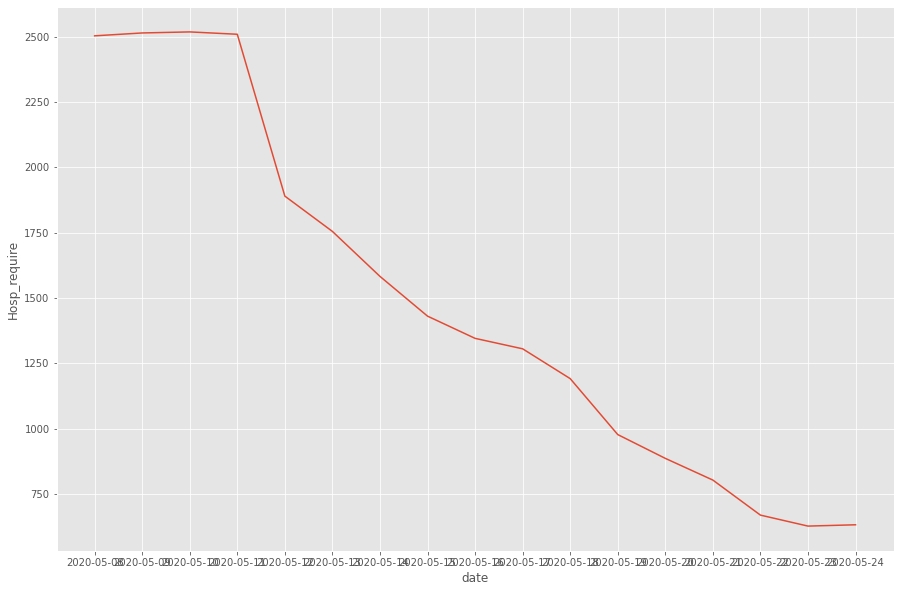

In [0]:
sns.lineplot(data=df_tokyo, x='date', y='Hosp_require')

In [0]:
df['sma_soudan'] = df.相談件数.rolling(window=7).mean()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107],
 <a list of 108 Text major ticklabel objects>)

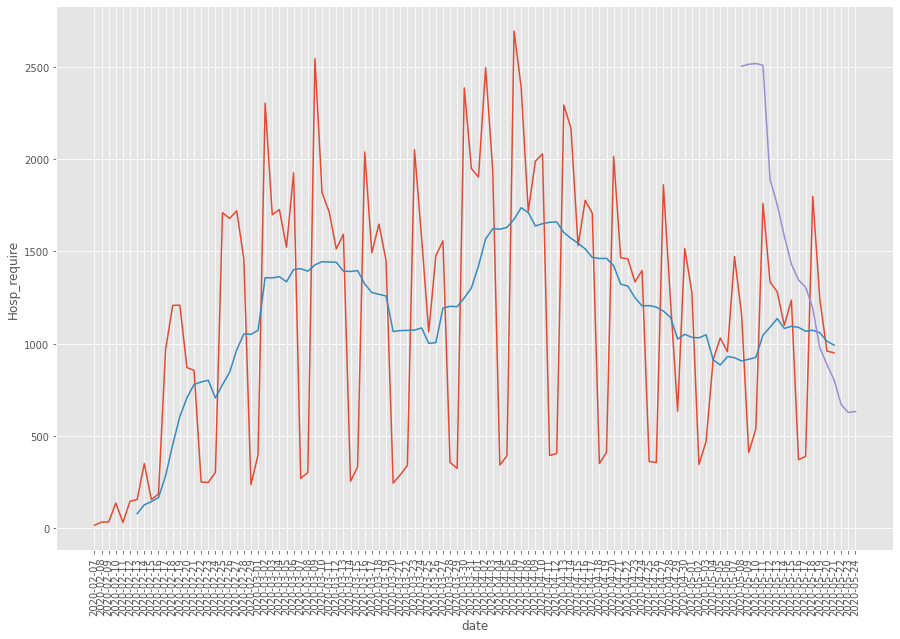

In [0]:
sns.lineplot(y='相談件数', x='受付_年月日', data=df)
sns.lineplot(y='sma_soudan', x='受付_年月日', data=df)
sns.lineplot(data=df_tokyo, x='date', y='Hosp_require')
plt.xticks(    rotation=90)

In [0]:
sns.lineplot(data=df_diff, x='date', y='confirmed')
sns.lineplot(data=df_diff, x='date', y='Hosp_reserve')

In [0]:
df.groupby('曜日').mean()

In [0]:
import pandas as pd

In [0]:
covid_url = "https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_2/covid19-dataset-in-japan/covid_jpn_prefecture.csv"
df_covid = pd.read_csv(covid_url, low_memory=False)

covid_url = "https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_2/covid19-dataset-in-japan/covid_jpn_total.csv"
df_covid_total = pd.read_csv(covid_url, low_memory=False)

In [0]:
df_covid = df_covid.rename(
    {"Positive": "confirmed", "Discharged": "recovered", "Fatal": "deaths", "Date": "date", "Prefecture": "prefecture", "Tested": "tested", "Recovered": "recoverd", "Infected": "infected"},
    axis=1
)
df_covid["infected"] = df_covid["confirmed"] - df_covid["deaths"] - df_covid["recovered"]
df_covid = df_covid.sort_values(['prefecture', 'date'])
df_covid

In [0]:
sns.barplot(x='date', y='confirmed', data=df_covid)

In [0]:
#df_covid = df_covid.set_index('date')
df_diff = df_covid.groupby('prefecture').diff()
df_diff = df_diff.reset_index()

In [0]:
df_diff

In [0]:
df_covid_total.head()

In [0]:
df_covid_total = df_covid_total.rename(
    {"Positive": "confirmed", "Discharged": "recovered", "Fatal": "deaths", "Date": "date", "Tested": "tested", "Recovered": "recoverd", "Infected": "infected"},
    axis=1
)
df_covid_total["infected"] = df_covid_total["confirmed"] - df_covid_total["deaths"] - df_covid_total["recovered"]

In [0]:
df_covid_total[df_covid_total['Location']=='Domestic']['infected'].plot()
df_covid_total[df_covid_total['Location']=='Domestic']['deaths'].plot()
df_covid_total[df_covid_total['Location']=='Domestic']['confirmed'].plot()
df_covid_total[df_covid_total['Location']=='Domestic']['recovered'].plot()

In [0]:
df_covid_total.info()
df_covid_total = df_covid_total.dropna(axis=1)

In [0]:
#df_covid_total['infected_SMA'] = df_covid_total['infected'].rolling(window=7).mean()

In [0]:
df_covid_total.head()
df_covid_total.set_index('date', inplace=True)

In [0]:
df_covid_total.tail()

In [0]:
df_covid_total = df_covid_total[df_covid_total['Location']=='Domestic']
df_covid_total = df_covid_total.drop('Location', axis=1)

In [0]:
import pandas as pd
pd.set_option('display.max_rows', 50)
df_covid_total.Hosp_require.plot()
df

In [0]:
df_covid_total['label'] = df_covid_total['infected'].shift(-7)

In [0]:
df_covid_total

In [0]:
df_covid_total['infected'].plot()
df_covid_total['infected_SMA'].plot()

In [0]:

test_csv = df_covid_total[-7:]
train_csv = df_covid_total[:-7]


In [0]:
train_csv

In [0]:
test_csv

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
#説明変数の読み込み
X_trainvalid = train_csv
X_test = test_csv.drop(['label'], axis=1)

In [0]:
#train dataとtest dataの結合（データの取り扱いを簡単にしています）
X_traintest_temp = pd.concat([X_trainvalid, X_test], axis=0)

In [0]:
#説明変数の選択
import sklearn
X_traintest = X_traintest_temp[['confirmed','recovered','infected','deaths','Hosp_severe']]
X_traintest = pd.DataFrame(sklearn.preprocessing.scale(X_traintest))
#デフォルトではsqft_basementとconditionを用いて予測を行なっている

In [0]:
#train dataとtest dataの分割
X_train = X_traintest.iloc[:train_csv.shape[0], :]
X_test = X_traintest.iloc[train_csv.shape[0]:, :]

In [0]:
#目的変数の読み込み（log変換を行なっています）
y_train = train_csv["infected"].values

In [0]:
#線形回帰モデルの構築とモデルによる予測
model = LinearRegression().fit(X_train, y_train)
test_pred = model.predict(X_test)

In [0]:
#提出ファイルの出力
sub_df = pd.DataFrame({"date":test_csv.index,"infected":test_pred})

In [0]:
sub_df

In [0]:
df_covid_total.tail(7)

In [0]:
accuracy = model.score(X_train, y_train)
accuracy

In [0]:
sns.lineplot(x=df_covid_total.index, y='infected', data=df_covid_total)
sns.lineplot(x='date', y='infected', data=sub_df)

plt.xticks(rotation=90)

In [0]:
sns.lineplot(x='date', y='infected', data=sub_df)

In [0]:
mobile_url = 'https://raw.githubusercontent.com/TakatoMatsumoto/DataPolicyStudies/master/covid19-dataset-in-japan/Global_Mobility_Report.csv'
df_mobile = pd.read_csv(mobile_url, low_memory=False)

In [0]:
df_mobile = df_mobile[df_mobile['country_region']=='Japan']
df_mobile

In [0]:
df_mobile['sub_region_2'].unique()

In [0]:
df_mobile = df_mobile.drop(['country_region_code', 'country_region', 'sub_region_2'], axis=1)

In [0]:
df_mobile = df_mobile.rename(
    {"sub_region_1": "prefecture"},
    axis=1
)

In [0]:
df_mobile = df_mobile.replace(np.nan, 'General')
df_mobile['date'] =  pd.to_datetime(df_mobile['date'])
df_mobile.set_index(pd.DatetimeIndex(df_mobile['date']), inplace=True)

In [0]:
df_mobile

In [0]:
sns.lineplot(x="date", y="retail_and_recreation_percent_change_from_baseline", hue='prefecture', data=df_mobile)

In [0]:
df = pd.merge(df_covid, df_mobile, on=['prefecture', 'date'])

In [0]:
df

In [0]:
df.info()
df['prefecture'].unique()
df.to_csv('covid.csv')

In [0]:
df.index = df.date

In [0]:
df_diff = df[['confirmed', 'tested', 'recovered', 'deaths', 'infected']].diff()

In [0]:
df.columns

In [0]:
cols = ['prefecture', 'confirmed', 'tested', 'recovered', 'deaths',
       'infected', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']

In [0]:
df.info()